# Read dataset

In [1]:
import numpy as np 
import pandas as pd 
data_df = pd.read_csv('data\mitbih_train.csv',header=None) 
print(data_df.shape)
data_df.head()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\20235152\AppData\Local\Temp\ipykernel_19320\2590930930.py:3: SyntaxWarning: invalid escape sequence '\m'
  data_df = pd.read_csv('data\mitbih_train.csv',header=None)


(87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
data_df[187].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

# Split the data into features and class labels

In [3]:
x_data = data_df.iloc[:, :187]
y_label = data_df[187]

In [4]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y_label.value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [6]:
y_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64

In [7]:
# Convert y_label to string type if necessary
y_label = y_label.astype(str)

# Replace multi-class labels with binary-class labels
y_label.replace(['1.0', '2.0', '3.0', '4.0'], 'arrhythmia', inplace=True)
y_label.replace(['0.0'], 'normal', inplace=True)


In [8]:
y_label.value_counts()

187
normal        72471
arrhythmia    15083
Name: count, dtype: int64

# Train-test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, random_state=101)

# Model training

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=101, n_estimators=150)
model.fit(X_train, y_train)

# training accuracy
print('Accuracy for the train data', model.score(X_train, y_train))


Accuracy for the train data 1.0


# Model testing

In [12]:
from sklearn import metrics
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("*** Confusion Matrix ***")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9781625473982366
*** Confusion Matrix ***
[[ 3275   428]
 [   50 18136]]


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=101, n_estimators=150)

# Perform cross-validation
cv_scores = cross_val_score(model, x_data, y_label, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())


Cross-validation scores: [0.87579236 0.97921307 0.95499971 0.98983496 0.98806396]
Mean accuracy: 0.957580812791542
Standard deviation of accuracy: 0.0427399582423113


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

def bootstrap(X, y, model, n_samples=100):
    models = []
    metrics = {"Precision": [], "Recall": [], "F1": []}
    sample_indices = []
    
    # Initialize tqdm for the overall progress
    with tqdm(total=n_samples, desc="Bootstrap Progress") as pbar_resample:
        for i in range(n_samples):
            pbar_resample.set_postfix({"Stage": "Resampling"})
            # Bootstrap resampling
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            sample_indices.append(indices)
            X_sample = X.iloc[indices, :]
            y_sample = y.iloc[indices]
            
            # Update the resampling progress
            pbar_resample.update(1)
            
            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X_sample, y_sample, test_size=0.33, random_state=42
            )

            # Train the model
            model.fit(X_train, y_train)
            
            # Evaluate the model
            y_pred = model.predict(X_test)
            precision = precision_score(y_test, y_pred, average="macro")
            recall = recall_score(y_test, y_pred, average="macro")
            f1 = f1_score(y_test, y_pred, average="macro")
            
            metrics["Precision"].append(precision)
            metrics["Recall"].append(recall)
            metrics["F1"].append(f1)
            
            # Save the trained model
            models.append(model)
    
    # Create a DataFrame to store results
    pred_df = pd.DataFrame({
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1": metrics["F1"],
        "Models": models,
        "Sample_indices": sample_indices,
    })

    return models, pred_df


# Usage:
from sklearn.ensemble import RandomForestClassifier

# training based on RF
model = RandomForestClassifier(random_state=101, n_estimators=150)

# Call the bootstrap function
models, pred_df = bootstrap(x_data, y_label, model)


Bootstrap Progress: 100%|██████████| 100/100 [2:29:02<00:00, 89.42s/it, Stage=Resampling] 


Summary Statistics:
Precision: Mean = 0.9898868664145324, Std = 0.0007143656312984786
Recall: Mean = 0.9680013294865567, Std = 0.0019548039638408693
F1 Score: Mean = 0.9785307974156674, Std = 0.0012639433782159798


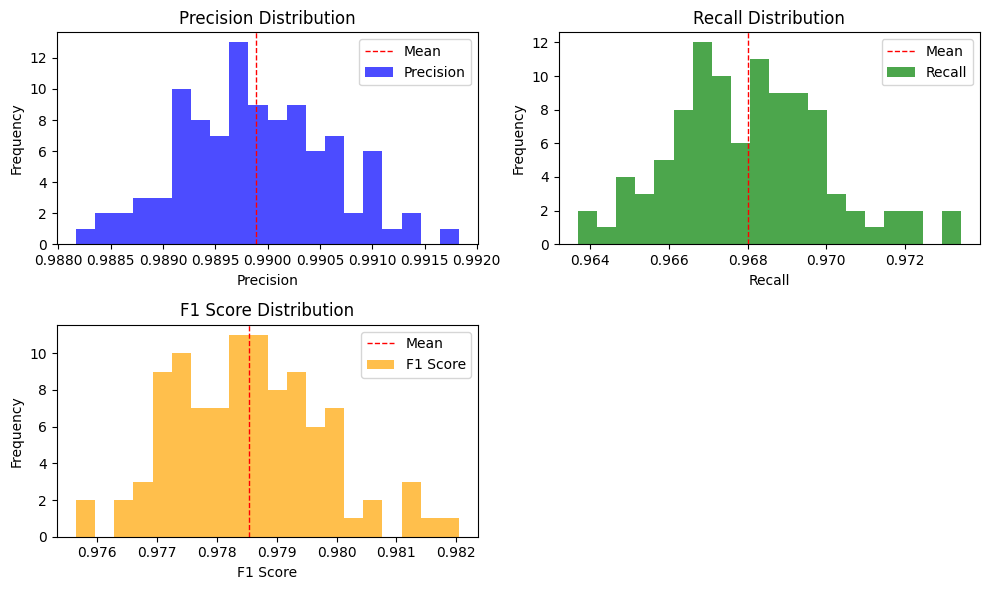

In [29]:
import matplotlib.pyplot as plt


# Summary statistics
precision_mean = pred_df['Precision'].mean()
precision_std = pred_df['Precision'].std()
recall_mean = pred_df['Recall'].mean()
recall_std = pred_df['Recall'].std()
f1_mean = pred_df['F1'].mean()
f1_std = pred_df['F1'].std()

print("Summary Statistics:")
print(f"Precision: Mean = {precision_mean}, Std = {precision_std}")
print(f"Recall: Mean = {recall_mean}, Std = {recall_std}")
print(f"F1 Score: Mean = {f1_mean}, Std = {f1_std}")

# Visualization
plt.figure(figsize=(10, 6))

# Precision distribution
plt.subplot(2, 2, 1)
plt.hist(pred_df['Precision'], bins=20, color='blue', alpha=0.7)
plt.axvline(precision_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Precision Distribution')
plt.xlabel('Precision')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Precision'])

# Recall distribution
plt.subplot(2, 2, 2)
plt.hist(pred_df['Recall'], bins=20, color='green', alpha=0.7)
plt.axvline(recall_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Recall Distribution')
plt.xlabel('Recall')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Recall'])

# F1 Score distribution
plt.subplot(2, 2, 3)
plt.hist(pred_df['F1'], bins=20, color='orange', alpha=0.7)
plt.axvline(f1_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('F1 Score Distribution')
plt.xlabel('F1 Score')
plt.ylabel('Frequency')
plt.legend(['Mean', 'F1 Score'])

plt.tight_layout()
plt.show()


Confidence Intervals:
Precision: [0.9897468507507979, 0.9900268820782668]
Recall: [0.9676181879096439, 0.9683844710634695]
F1 Score: [0.9782830645135371, 0.9787785303177977]


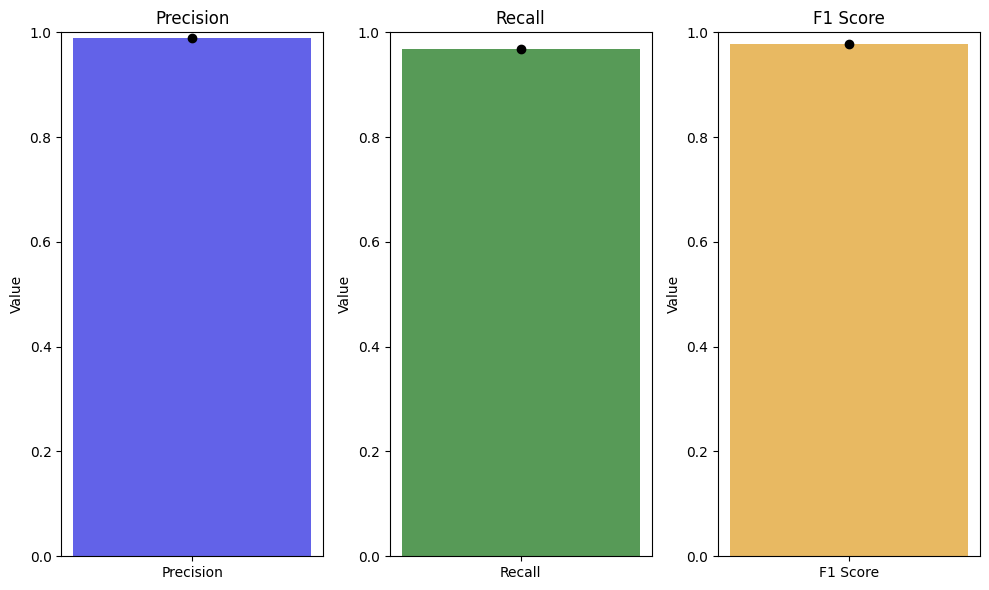

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confidence intervals
alpha = 0.95  # Confidence level
z_critical = 1.96  # For 95% confidence level

precision_mean = pred_df['Precision'].mean()
precision_std = pred_df['Precision'].std()
precision_ci = z_critical * (precision_std / np.sqrt(len(pred_df)))
precision_lower_bound = precision_mean - precision_ci
precision_upper_bound = precision_mean + precision_ci

recall_mean = pred_df['Recall'].mean()
recall_std = pred_df['Recall'].std()
recall_ci = z_critical * (recall_std / np.sqrt(len(pred_df)))
recall_lower_bound = recall_mean - recall_ci
recall_upper_bound = recall_mean + recall_ci

f1_mean = pred_df['F1'].mean()
f1_std = pred_df['F1'].std()
f1_ci = z_critical * (f1_std / np.sqrt(len(pred_df)))
f1_lower_bound = f1_mean - f1_ci
f1_upper_bound = f1_mean + f1_ci

# Print confidence intervals
print("Confidence Intervals:")
print(f"Precision: [{precision_lower_bound}, {precision_upper_bound}]")
print(f"Recall: [{recall_lower_bound}, {recall_upper_bound}]")
print(f"F1 Score: [{f1_lower_bound}, {f1_upper_bound}]")

# Visualize confidence intervals
plt.figure(figsize=(10, 6))

# Precision
plt.subplot(1, 3, 1)
sns.barplot(x=['Precision'], y=[precision_mean], color='blue', alpha=0.7)
plt.errorbar(x=['Precision'], y=[precision_mean], yerr=[[precision_mean - precision_lower_bound], [precision_upper_bound - precision_mean]], fmt='o', color='black')
plt.title('Precision')
plt.ylabel('Value')
plt.ylim(0, 1)

# Recall
plt.subplot(1, 3, 2)
sns.barplot(x=['Recall'], y=[recall_mean], color='green', alpha=0.7)
plt.errorbar(x=['Recall'], y=[recall_mean], yerr=[[recall_mean - recall_lower_bound], [recall_upper_bound - recall_mean]], fmt='o', color='black')
plt.title('Recall')
plt.ylabel('Value')
plt.ylim(0, 1)

# F1 Score
plt.subplot(1, 3, 3)
sns.barplot(x=['F1 Score'], y=[f1_mean], color='orange', alpha=0.7)
plt.errorbar(x=['F1 Score'], y=[f1_mean], yerr=[[f1_mean - f1_lower_bound], [f1_upper_bound - f1_mean]], fmt='o', color='black')
plt.title('F1 Score')
plt.ylabel('Value')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


Mean and Confidence Intervals:
Precision: Mean=0.9898868664145324, CI=[0.9897468507507979, 0.9900268820782668]
Recall: Mean=0.9680013294865567, CI=[0.9676181879096439, 0.9683844710634695]
F1 Score: Mean=0.9785307974156674, CI=[0.9782830645135371, 0.9787785303177977]


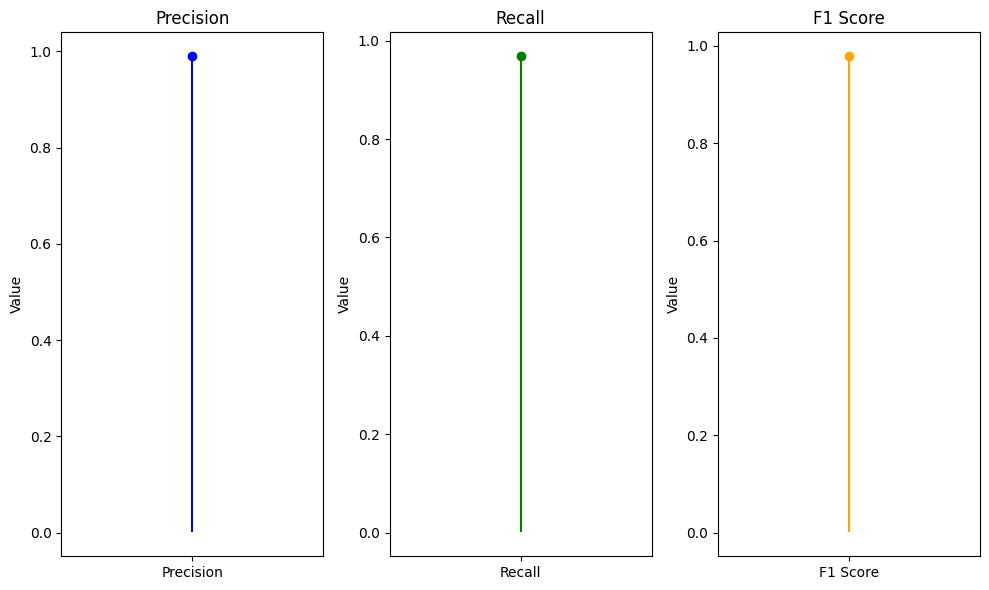

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if pred_df is a DataFrame
if isinstance(pred_df, pd.DataFrame):
    # Compute mean and confidence intervals for each metric
    precision_mean = pred_df['Precision'].mean()
    recall_mean = pred_df['Recall'].mean()
    f1_mean = pred_df['F1'].mean()

    precision_std = pred_df['Precision'].std()
    recall_std = pred_df['Recall'].std()
    f1_std = pred_df['F1'].std()

    z_critical = 1.96  # For 95% confidence level

    precision_ci = z_critical * (precision_std / np.sqrt(len(pred_df)))
    recall_ci = z_critical * (recall_std / np.sqrt(len(pred_df)))
    f1_ci = z_critical * (f1_std / np.sqrt(len(pred_df)))

    # Print mean and confidence intervals
    print("Mean and Confidence Intervals:")
    print(f"Precision: Mean={precision_mean}, CI=[{precision_mean - precision_ci}, {precision_mean + precision_ci}]")
    print(f"Recall: Mean={recall_mean}, CI=[{recall_mean - recall_ci}, {recall_mean + recall_ci}]")
    print(f"F1 Score: Mean={f1_mean}, CI=[{f1_mean - f1_ci}, {f1_mean + f1_ci}]")

    # Visualize mean intervals
    plt.figure(figsize=(10, 6))

    # Precision
    plt.subplot(1, 3, 1)
    plt.errorbar(x=['Precision'], y=[precision_mean], yerr=[[precision_mean - precision_ci], [precision_ci]], fmt='o', color='blue')
    plt.title('Precision')
    plt.ylabel('Value')

    # Recall
    plt.subplot(1, 3, 2)
    plt.errorbar(x=['Recall'], y=[recall_mean], yerr=[[recall_mean - recall_ci], [recall_ci]], fmt='o', color='green')
    plt.title('Recall')
    plt.ylabel('Value')

    # F1 Score
    plt.subplot(1, 3, 3)
    plt.errorbar(x=['F1 Score'], y=[f1_mean], yerr=[[f1_mean - f1_ci], [f1_ci]], fmt='o', color='orange')
    plt.title('F1 Score')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()
else:
    print("pred_df is not a DataFrame.")
